<a href="https://colab.research.google.com/github/skyyyyy12/EV-CAPSTONE-PROJECT/blob/main/capstone_ev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 1**

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
# loading dataset
ev_df = pd.read_excel('/content/States_Electric_Vehicle_Registrations_2018.xlsx', skiprows=4)
state_dv = pd.read_excel('/content/state_codes.xlsx')
all_vehicle_df = pd.read_excel('/content/States_All_Vehicle_Registrations_2018.xlsx',  skiprows=6)
registration_df = pd.read_excel('/content/States_Annual_Energy_Generation_Sources_1990_2019.xlsx', skiprows=1)


In [ ]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Alaska      50 non-null     object 
 2   530         50 non-null     int64  
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  8 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 2.1+ KB


In [ ]:
state_dv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state_code  51 non-null     object
 1   state_name  51 non-null     object
dtypes: object(2)
memory usage: 948.0+ bytes


In [ ]:
all_vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   54 non-null     object
 1   Unnamed: 1   57 non-null     object
 2   Unnamed: 2   54 non-null     object
 3   Unnamed: 3   53 non-null     object
 4   Unnamed: 4   55 non-null     object
 5   Unnamed: 5   54 non-null     object
 6   Unnamed: 6   53 non-null     object
 7   Unnamed: 7   55 non-null     object
 8   Unnamed: 8   54 non-null     object
 9   Unnamed: 9   53 non-null     object
 10  Unnamed: 10  55 non-null     object
 11  Unnamed: 11  54 non-null     object
 12  Unnamed: 12  53 non-null     object
 13  Unnamed: 13  55 non-null     object
 14  Unnamed: 14  54 non-null     object
 15  Unnamed: 15  53 non-null     object
dtypes: object(16)
memory usage: 7.4+ KB


In [ ]:
registration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53756 entries, 0 to 53755
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        53756 non-null  int64  
 1   STATE                       53756 non-null  object 
 2   TYPE OF PRODUCER            53756 non-null  object 
 3   ENERGY SOURCE               53756 non-null  object 
 4   GENERATION (Megawatthours)  53756 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB


In [ ]:
# Check dataset dimensions and preview
print("EV DF shape:", ev_df.shape)
print("All Vehicles DF shape:", all_vehicle_df.shape)
print("Energy Registration DF shape:", registration_df.shape)
print("State Codes DF shape:", state_dv.shape)

# Display a few rows to check
ev_df.head()


EV DF shape: (50, 5)
All Vehicles DF shape: (58, 16)
Energy Registration DF shape: (53756, 5)
State Codes DF shape: (51, 2)


,unnamed:_0,alaska,NaN,unnamed:_3,unnamed:_4
0,NaN,Arizona,15000,NaN,NaN
1,NaN,Arkansas,520,NaN,NaN
2,NaN,California,256800,NaN,NaN
3,NaN,Colorado,11700,NaN,NaN
4,NaN,Connecticut,4450,NaN,NaN


# **Task 2**

In [ ]:
# Reload the EV dataset without header
temp_df = pd.read_excel('/content/States_Electric_Vehicle_Registrations_2018.xlsx', skiprows=4, header=None)

# Display the first few rows to check what’s useful
print(temp_df.head(10))


    0                     1       2   3    4
0 NaN                Alaska     530 NaN  NaN
1 NaN               Arizona   15000 NaN  NaN
2 NaN              Arkansas     520 NaN  NaN
3 NaN            California  256800 NaN  NaN
4 NaN              Colorado   11700 NaN  NaN
5 NaN           Connecticut    4450 NaN  NaN
6 NaN              Delaware     720 NaN  NaN
7 NaN  District Of Columbia     970 NaN  NaN
8 NaN               Florida   25200 NaN  NaN
9 NaN               Georgia   15300 NaN  NaN


In [ ]:
# Select relevant columns (State and EV count)
ev_df = temp_df.iloc[:, [1, 2]]
ev_df.columns = ['state', 'ev_registrations']

# Drop rows with missing state names
ev_df.dropna(subset=['state'], inplace=True)

# Reset index
ev_df.reset_index(drop=True, inplace=True)

# Check cleaned version
print(ev_df.head())


        state  ev_registrations
0      Alaska               530
1     Arizona             15000
2    Arkansas               520
3  California            256800
4    Colorado             11700


/tmp/ipython-input-852093442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_df.dropna(subset=['state'], inplace=True)


In [ ]:
# Load without headers (manual)
temp_all_vehicle = pd.read_excel('/content/States_All_Vehicle_Registrations_2018.xlsx', skiprows=6, header=None)

# Check the structure
print(temp_all_vehicle.head(10))


         0            1          2        3             4            5   \
0       NaN          NaN        NaN      NaN           NaN          NaN   
1       NaN  AUTOMOBILES        NaN      NaN         BUSES          NaN   
2     STATE  PRIVATE AND        NaN      NaN           NaN          NaN   
3       NaN   COMMERCIAL   PUBLICLY      NaN   PRIVATE AND     PUBLICLY   
4       NaN   (INCLUDING  OWNED (1)    TOTAL    COMMERCIAL    OWNED (1)   
5       NaN    TAXICABS)        NaN      NaN           NaN          NaN   
6   Alabama      2116626      44586  2161212   5633.635236   132.974093   
7   Alaska        179131       4139   183270          7856   617.322626   
8   Arizona      2372443      19329  2391772   1391.050584  6958.088141   
9  Arkansas       908561      12600   921161  11290.281712   715.885705   

             6            7             8               9            10  \
0           NaN          NaN           NaN             NaN          NaN   
1           NaN       TR

In [ ]:
# Let's assume Column 1 is state and Column 2 is total vehicle registrations
all_vehicle_df = temp_all_vehicle.iloc[:, [1, 2]]  # Adjust columns as per your data
all_vehicle_df.columns = ['state', 'all_vehicles']

# Clean NaNs
all_vehicle_df.dropna(subset=['state'], inplace=True)
all_vehicle_df.reset_index(drop=True, inplace=True)

print(all_vehicle_df.head())


         state all_vehicles
0  AUTOMOBILES          NaN
1  PRIVATE AND          NaN
2   COMMERCIAL     PUBLICLY
3   (INCLUDING    OWNED (1)
4    TAXICABS)          NaN


/tmp/ipython-input-256316268.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_vehicle_df.dropna(subset=['state'], inplace=True)


In [ ]:
# Reload with more rows skipped
temp_all_vehicle = pd.read_excel('/content/States_All_Vehicle_Registrations_2018.xlsx', skiprows=10, header=None)

# Preview it again
print(temp_all_vehicle.head(10))


             0           1          2         3             4             5   \
0           NaN  (INCLUDING  OWNED (1)     TOTAL    COMMERCIAL     OWNED (1)   
1           NaN   TAXICABS)        NaN       NaN           NaN           NaN   
2       Alabama     2116626      44586   2161212   5633.635236    132.974093   
3       Alaska       179131       4139    183270          7856    617.322626   
4       Arizona     2372443      19329   2391772   1391.050584   6958.088141   
5      Arkansas      908561      12600    921161  11290.281712    715.885705   
6   California     14820833     244994  15065827         34437  65255.244456   
7     Colorado      1782358      15819   1798177          5718   7585.100032   
8  Connecticut      1305544       1165   1306709  11717.810911     35.592047   
9     Delaware       431850       1513    433363   3351.781644    450.409895   

             6           7              8                9           10  \
0         TOTAL  COMMERCIAL      OWNED (1)  

In [ ]:
# Adjust the column indexes if needed
all_vehicle_df = temp_all_vehicle.iloc[:, [1, 2]]  # Adjust if actual data is elsewhere
all_vehicle_df.columns = ['state', 'all_vehicles']

# Clean up
all_vehicle_df.dropna(subset=['state'], inplace=True)
all_vehicle_df.reset_index(drop=True, inplace=True)

print(all_vehicle_df.head())


        state all_vehicles
0  (INCLUDING    OWNED (1)
1   TAXICABS)          NaN
2     2116626        44586
3      179131         4139
4     2372443        19329


/tmp/ipython-input-2544560572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_vehicle_df.dropna(subset=['state'], inplace=True)


In [ ]:
# Test by skipping more rows
temp_all_vehicle = pd.read_excel('/content/States_All_Vehicle_Registrations_2018.xlsx', skiprows=12, header=None)

# Show first 10 rows
temp_all_vehicle.head(10)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Alabama,2116626.0,44586.0,2161212.0,5633.635236,132.974093,5766.609329,2955947.0,67261.409630,3.023208e+06,109060.0,952.135108,110012.135108,5.187267e+06,112932.518832,5.300199e+06
1,Alaska,179131.0,4139.0,183270.0,7856.000000,617.322626,8473.322626,563583.0,16807.236526,5.803902e+05,31542.0,8.000000,31550.000000,7.821120e+05,21571.559152,8.036836e+05
2,Arizona,2372443.0,19329.0,2391772.0,1391.050584,6958.088141,8349.138725,3196426.0,39491.535925,3.235918e+06,170271.0,3.000000,170274.000000,5.740531e+06,65781.624066,5.806313e+06
3,Arkansas,908561.0,12600.0,921161.0,11290.281712,715.885705,12006.167417,1765374.0,27477.128806,1.792851e+06,91127.0,0.000000,91127.000000,2.776352e+06,40793.014510,2.817145e+06
4,California,14820833.0,244994.0,15065827.0,34437.000000,65255.244456,99692.244456,14739522.0,294442.632872,1.503396e+07,808889.0,13955.000000,822844.000000,3.040368e+07,618646.877329,3.102233e+07
5,Colorado,1782358.0,15819.0,1798177.0,5718.000000,7585.100032,13303.100032,3314999.0,38669.761806,3.353669e+06,190735.0,134.000000,190869.000000,5.293810e+06,62207.861838,5.356018e+06
6,Connecticut,1305544.0,1165.0,1306709.0,11717.810911,35.592047,11753.402959,1468599.0,5080.373267,1.473679e+06,87640.0,19.773360,87659.773360,2.873501e+06,6300.738674,2.879802e+06
7,Delaware,431850.0,1513.0,433363.0,3351.781644,450.409895,3802.191539,540225.0,3006.443815,5.432314e+05,28071.0,0.000000,28071.000000,1.003498e+06,4969.853710,1.008468e+06
8,Dist. of Col.,188768.0,20955.0,209723.0,1012.000000,4076.020214,5088.020214,113705.0,19104.587311,1.328096e+05,3911.0,401.000000,4312.000000,3.073960e+05,44536.607525,3.519326e+05
9,Florida,7851192.0,114899.0,7966091.0,24961.000000,34596.396322,59557.396322,8733121.0,149733.527079,8.882855e+06,584851.0,2648.000000,587499.000000,1.719412e+07,301876.923401,1.749600e+07


In [ ]:
# Final loading
temp_all_vehicle = pd.read_excel('/content/States_All_Vehicle_Registrations_2018.xlsx', skiprows=14, header=None)

# Extract the actual state and vehicle count columns
all_vehicle_df = temp_all_vehicle.iloc[:, [0, 1]].copy()
all_vehicle_df.columns = ['state', 'all_vehicles']

# Drop nulls and reset index
all_vehicle_df.dropna(subset=['state'], inplace=True)
all_vehicle_df.reset_index(drop=True, inplace=True)

# Final check
print(all_vehicle_df.head())


          state  all_vehicles
0       Arizona     2372443.0
1      Arkansas      908561.0
2   California     14820833.0
3     Colorado      1782358.0
4  Connecticut      1305544.0


In [ ]:
# Merge EV and All Vehicle Data on 'state'
ev_summary = pd.merge(ev_df, all_vehicle_df, on='state', how='left')


In [ ]:
# Merge with state codes
ev_summary = pd.merge(ev_summary, state_dv, left_on='state', right_on='state_name', how='left')

# Final check
print(ev_summary.head())


        state  ev_registrations  all_vehicles state_code  state_name
0      Alaska               530           NaN         AK      Alaska
1     Arizona             15000     2372443.0         AZ     Arizona
2    Arkansas               520      908561.0         AR    Arkansas
3  California            256800           NaN         CA  California
4    Colorado             11700           NaN         CO    Colorado


In [ ]:
# Summary statistics
print(ev_summary.describe())

# Check for missing values
print(ev_summary.isnull().sum())


       ev_registrations  all_vehicles
count         51.000000  2.000000e+01
mean       21289.607843  7.180838e+06
std        82733.971933  2.419410e+07
min          170.000000  2.140770e+05
25%         1015.000000  6.355920e+05
50%         3680.000000  1.721374e+06
75%         9065.000000  3.056178e+06
max       543610.000000  1.098136e+08
state                0
ev_registrations     0
all_vehicles        31
state_code           2
state_name           2
dtype: int64


# Task 3

/tmp/ipython-input-2217854626.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ev_registrations', y='state', data=top_ev_states.head(10), palette='viridis')


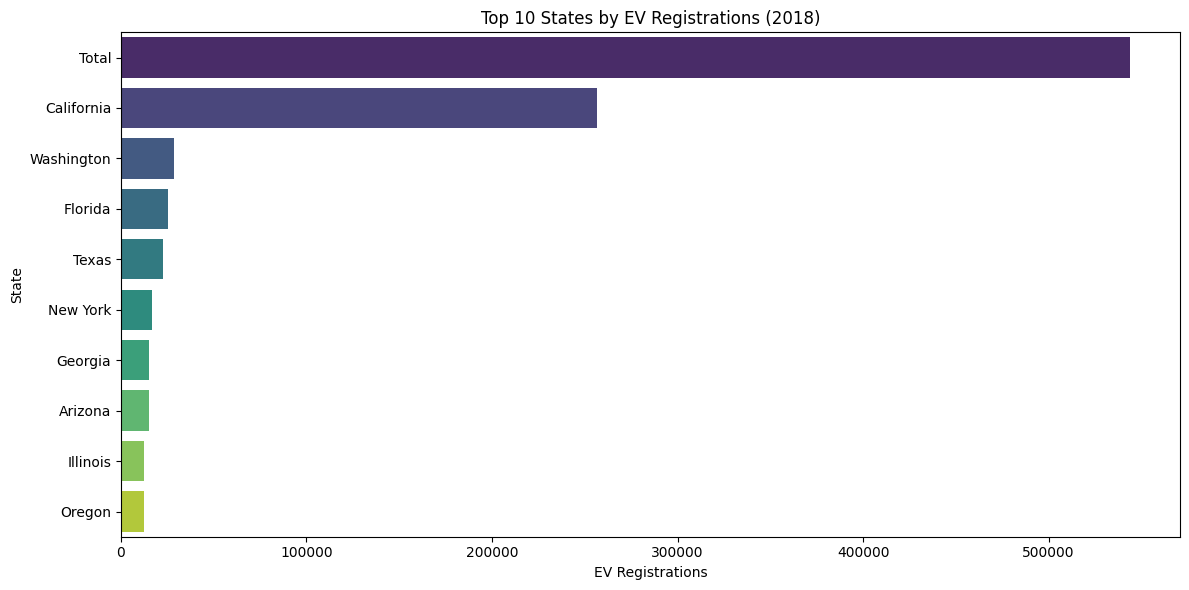

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by EV registrations
top_ev_states = ev_summary.sort_values(by='ev_registrations', ascending=False)

# Plot top 10
plt.figure(figsize=(12,6))
sns.barplot(x='ev_registrations', y='state', data=top_ev_states.head(10), palette='viridis')
plt.title('Top 10 States by EV Registrations (2018)')
plt.xlabel('EV Registrations')
plt.ylabel('State')
plt.tight_layout()
plt.show()


/tmp/ipython-input-842777001.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ev_percentage', y='state', data=top_ev_percent.head(10), palette='coolwarm')


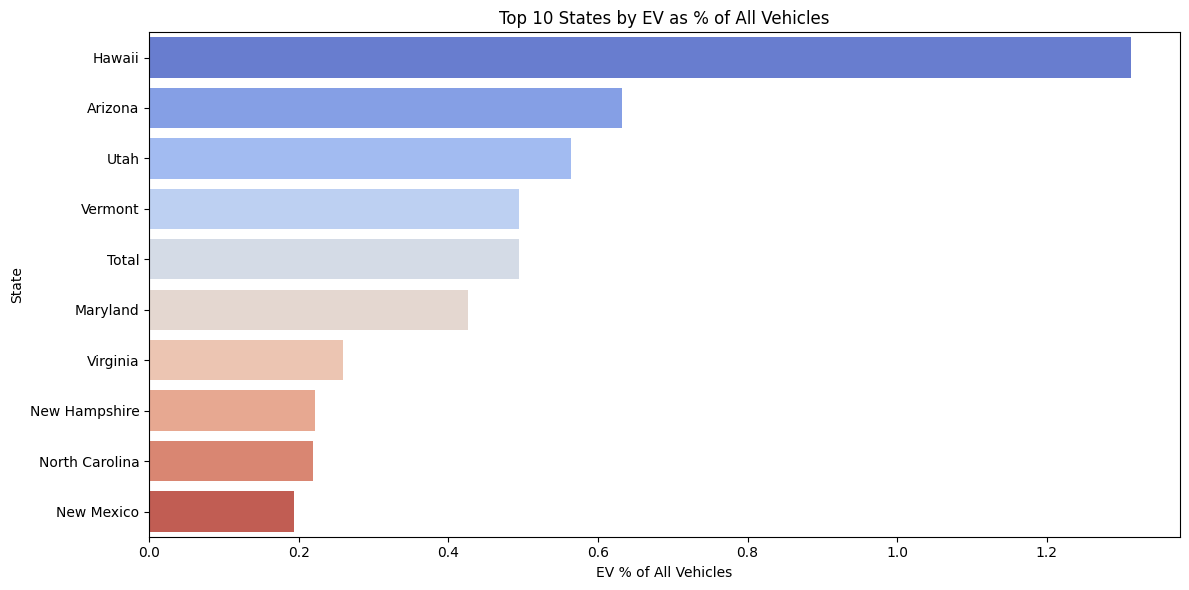

In [ ]:
# Add a new column for EV %
ev_summary['ev_percentage'] = (ev_summary['ev_registrations'] / ev_summary['all_vehicles']) * 100

# Sort and visualize top 10 by EV %
top_ev_percent = ev_summary.sort_values(by='ev_percentage', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='ev_percentage', y='state', data=top_ev_percent.head(10), palette='coolwarm')
plt.title('Top 10 States by EV as % of All Vehicles')
plt.xlabel('EV % of All Vehicles')
plt.ylabel('State')
plt.tight_layout()
plt.show()


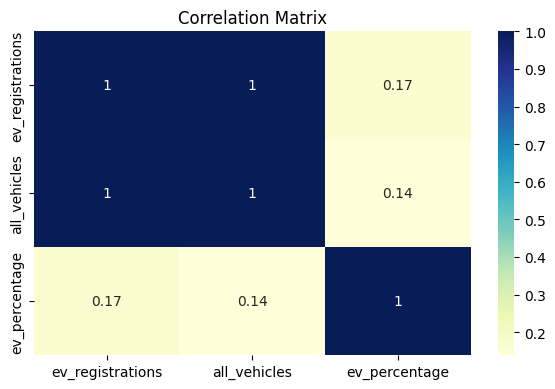

In [ ]:
# Select numeric columns
corr_data = ev_summary[['ev_registrations', 'all_vehicles', 'ev_percentage']]

# Correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(corr_data.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


# **task 3**

In [ ]:
# Filter energy data for year 2018
energy_2018 = registration_df[registration_df['YEAR'] == 2018].copy()

# Drop irrelevant producers (keep only "Total Electric Power Industry")
energy_2018 = energy_2018[energy_2018['TYPE OF PRODUCER'] == 'Total Electric Power Industry']


In [ ]:
energy_2018


,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
49519,2018,AK,Total Electric Power Industry,Total,6247359.0
49520,2018,AK,Total Electric Power Industry,Coal,628564.0
49521,2018,AK,Total Electric Power Industry,Hydroelectric Conventional,1664225.0
49522,2018,AK,Total Electric Power Industry,Natural Gas,2947902.0
49523,2018,AK,Total Electric Power Industry,Other,-3100.0
...,...,...,...,...,...
51609,2018,WY,Total Electric Power Industry,Other Gases,377641.0
51610,2018,WY,Total Electric Power Industry,Other,85266.0
51611,2018,WY,Total Electric Power Industry,Petroleum,40136.0
51612,2018,WY,Total Electric Power Industry,Solar Thermal and Photovoltaic,824.0


In [ ]:
# Group total generation by state and energy source
grouped_energy = energy_2018.groupby(['STATE', 'ENERGY SOURCE'])['GENERATION (Megawatthours)'].sum().reset_index()


In [ ]:
# Pivot to wide format
energy_pivot = grouped_energy.pivot(index='STATE', columns='ENERGY SOURCE', values='GENERATION (Megawatthours)').fillna(0)

# Reset index so we can merge later
energy_pivot.reset_index(inplace=True)
energy_pivot.columns.name = None  # remove label on top


In [ ]:
# Merge energy data with EV data
ev_energy = pd.merge(ev_summary, energy_pivot, left_on='state', right_on='STATE', how='left')

# Drop duplicate STATE column if needed
ev_energy.drop(columns=['STATE'], inplace=True)


In [ ]:
print(ev_energy.columns)


Index(['state', 'ev_registrations', 'all_vehicles', 'state_code_x',
       'state_name_x', 'ev_percentage', 'state_code_y', 'state_name_y', 'Coal',
       'Geothermal', 'Hydroelectric Conventional', 'Natural Gas', 'Nuclear',
       'Other', 'Other Biomass', 'Other Gases', 'Petroleum', 'Pumped Storage',
       'Solar Thermal and Photovoltaic', 'Total', 'Wind',
       'Wood and Wood Derived Fuels'],
      dtype='object')


In [ ]:
print(ev_energy.columns.tolist())


['state', 'ev_registrations', 'all_vehicles', 'state_code_x', 'state_name_x', 'ev_percentage', 'state_code_y', 'state_name_y', 'Coal', 'Geothermal', 'Hydroelectric Conventional', 'Natural Gas', 'Nuclear', 'Other', 'Other Biomass', 'Other Gases', 'Petroleum', 'Pumped Storage', 'Solar Thermal and Photovoltaic', 'Total', 'Wind', 'Wood and Wood Derived Fuels']


In [ ]:
corr_cols = ['ev_registrations', 'ev_percentage',
             'Coal (MWh)', 'Natural Gas (MWh)',
             'Wind (MWh)', 'Solar (MWh)',
             'Hydroelectric (MWh)']


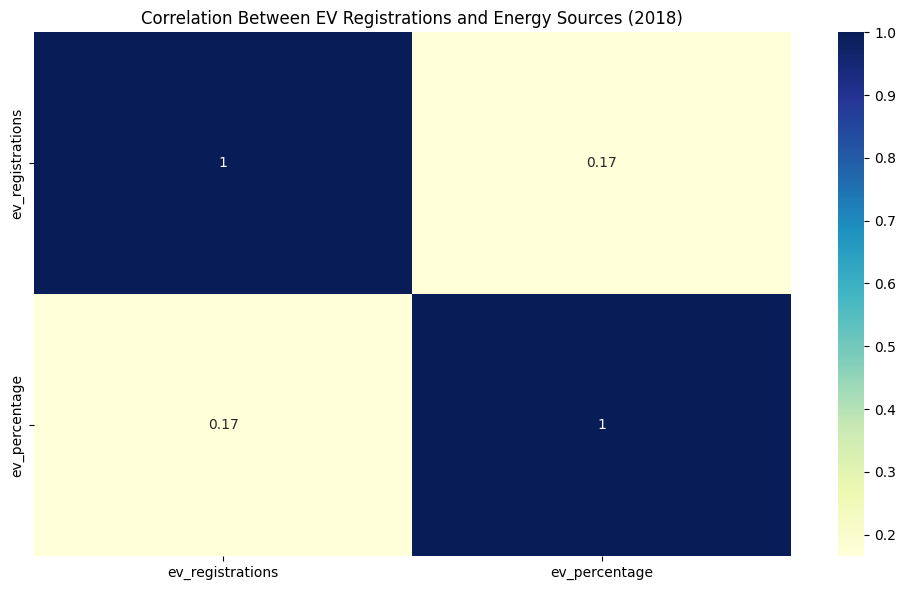

In [ ]:
available_cols = [col for col in corr_cols if col in ev_energy.columns]
correlation_data = ev_energy[available_cols].copy()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Between EV Registrations and Energy Sources (2018)')
plt.tight_layout()
plt.show()


## **Task 4**

In [ ]:
# Filter only total electric power producers
energy_full = registration_df[registration_df['TYPE OF PRODUCER'] == 'Total Electric Power Industry'].copy()

# Group by year and energy source
energy_trend = energy_full.groupby(['YEAR', 'ENERGY SOURCE'])['GENERATION (Megawatthours)'].sum().reset_index()


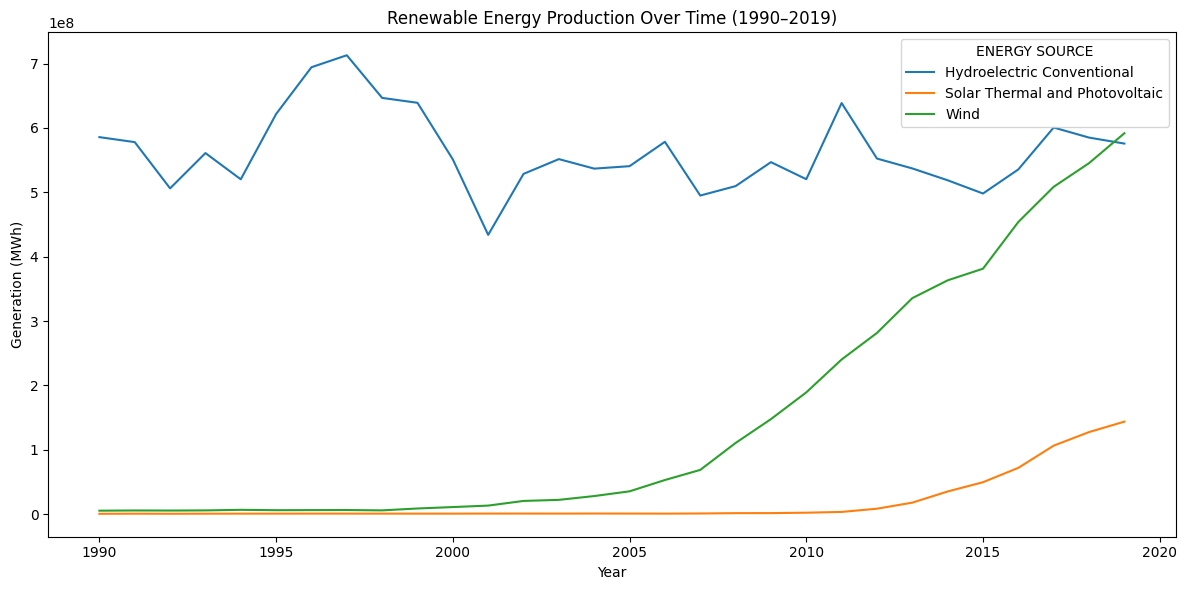

In [ ]:
# Select renewable sources
renewables = ['Solar Thermal and Photovoltaic', 'Wind', 'Hydroelectric Conventional']

# Filter data
renewable_trend = energy_trend[energy_trend['ENERGY SOURCE'].isin(renewables)]

# Plot line chart
plt.figure(figsize=(12,6))
sns.lineplot(data=renewable_trend, x='YEAR', y='GENERATION (Megawatthours)', hue='ENERGY SOURCE')
plt.title('Renewable Energy Production Over Time (1990–2019)')
plt.xlabel('Year')
plt.ylabel('Generation (MWh)')
plt.tight_layout()
plt.show()


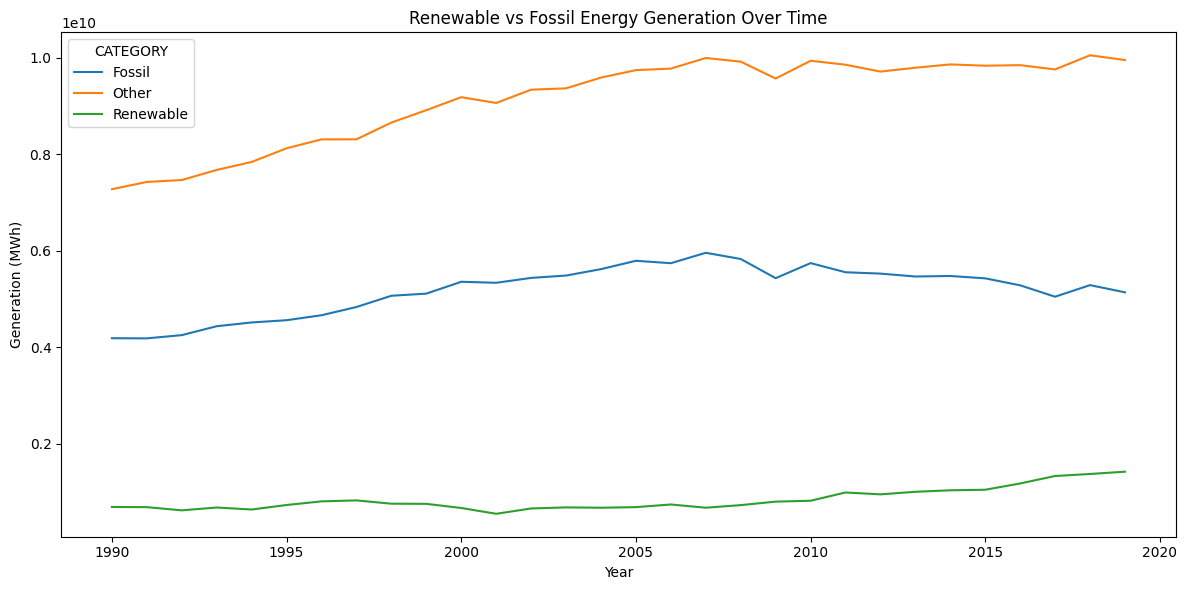

In [ ]:
# Define categories
renewable_sources = ['Solar Thermal and Photovoltaic', 'Wind', 'Hydroelectric Conventional', 'Geothermal', 'Wood and Wood Derived Fuels']
fossil_sources = ['Coal', 'Petroleum', 'Natural Gas']

# Add category column
energy_trend['CATEGORY'] = energy_trend['ENERGY SOURCE'].apply(
    lambda x: 'Renewable' if x in renewable_sources else ('Fossil' if x in fossil_sources else 'Other')
)

# Group and plot
category_trend = energy_trend.groupby(['YEAR', 'CATEGORY'])['GENERATION (Megawatthours)'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=category_trend, x='YEAR', y='GENERATION (Megawatthours)', hue='CATEGORY')
plt.title('Renewable vs Fossil Energy Generation Over Time')
plt.xlabel('Year')
plt.ylabel('Generation (MWh)')
plt.tight_layout()
plt.show()


## **Task 5**

In [ ]:
import plotly.express as px

In [ ]:
print(ev_summary[['state', 'state_code_x']].head())


        state state_code_x
0      Alaska           AK
1     Arizona           AZ
2    Arkansas           AR
3  California           CA
4    Colorado           CO


In [ ]:
import plotly.express as px

fig = px.choropleth(
    ev_summary,
    locations='state_code_x',          # use the actual column name from your data
    locationmode='USA-states',
    color='ev_registrations',
    scope='usa',
    color_continuous_scale='Viridis',
    title='EV Registrations by State (2018)'
)

fig.show()


In [ ]:
# Create a simple renewable energy total
ev_energy['total_renewable'] = (
    ev_energy.get('Solar Thermal and Photovoltaic', 0) +
    ev_energy.get('Wind', 0) +
    ev_energy.get('Hydroelectric Conventional', 0)
)


In [ ]:
import plotly.express as px

fig = px.choropleth(
    ev_energy,
    locations='state_code_x',
    locationmode='USA-states',
    color='category',
    scope='usa',
    title='EV vs Renewable Energy Category by State',
    color_discrete_map={
        'High EV & Renewable': 'darkgreen',
        'High EV, Low Renewable': 'gold',
        'Low EV, High Renewable': 'deepskyblue',
        'Low EV & Renewable': 'lightgray'
    }
)

fig.show()


In [ ]:
top_states = ev_energy.sort_values(by='ev_percentage', ascending=False).head(5)
print(top_states[['state', 'ev_percentage', 'total_renewable']])


      state  ev_percentage  total_renewable
10   Hawaii       1.312318              NaN
1   Arizona       0.632260              NaN
43     Utah       0.563667              NaN
44  Vermont       0.495149              NaN
50    Total       0.495030              NaN


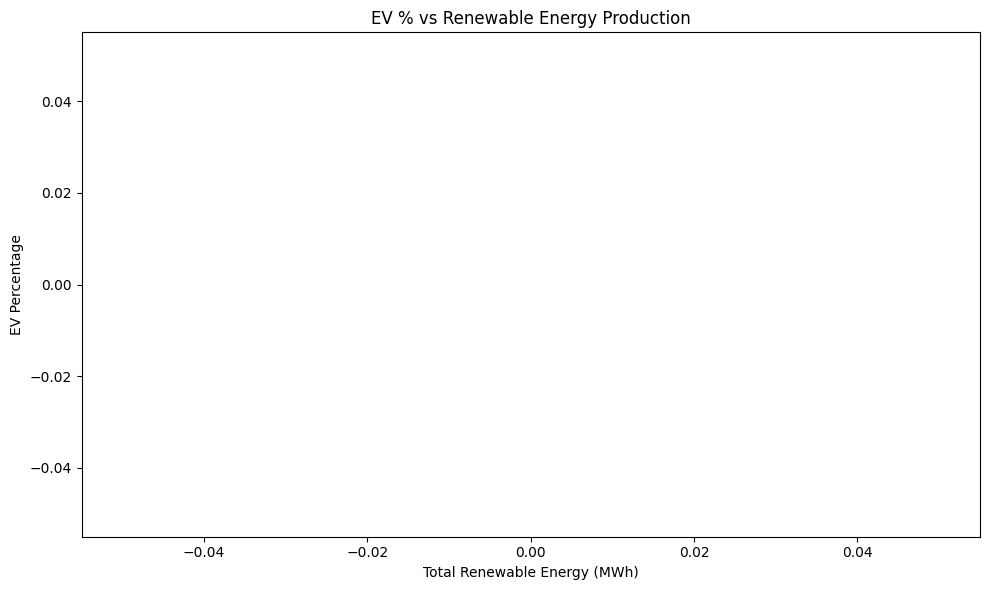

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=ev_energy, x='total_renewable', y='ev_percentage')
plt.title('EV % vs Renewable Energy Production')
plt.xlabel('Total Renewable Energy (MWh)')
plt.ylabel('EV Percentage')
plt.tight_layout()
plt.show()
